Score: 572.8086951121095
Score: 929.6183828652775
Score: 1945.9134128424375
Score: 1320.2694967700672
Score: 683.2640487813928


<Figure size 640x480 with 0 Axes>

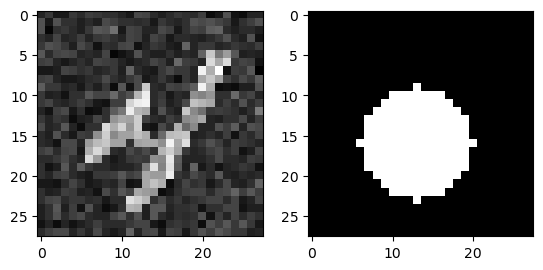

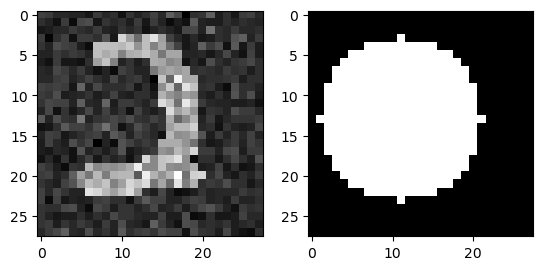

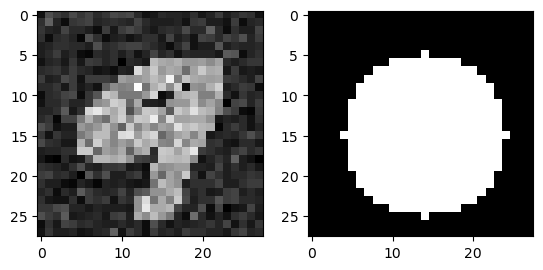

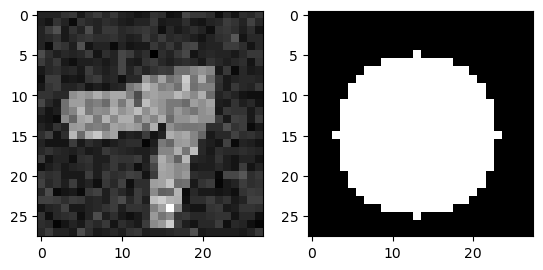

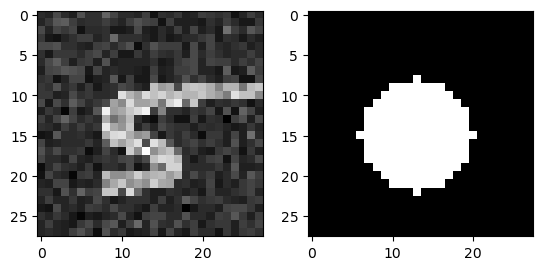

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

#Preprocess Data
with open('circles_filled_dataset.pkl', 'rb') as f:
    circle_df = pickle.load(f)

with open('test_set.pkl', 'rb') as f:
    test = pickle.load(f)

test = test.to_numpy()
filters = circle_df.iloc[:, :784].to_numpy()

#Helper functions-----------------------------------------------------------
def generate_observed_data(base, increase_multiplier, idx, filter_set):
    increased = filter_set[idx]*((base * increase_multiplier) - base) + base
    baseline = np.ones((784,)) * base
    inject_poisson = np.vectorize(lambda x: np.random.poisson(x))
    observed = inject_poisson(increased)

    return observed, baseline

    
def kuldorff(observed, baseline, filters):
    max_score = 0

    for i in range(filters.shape[0]):
        count = sum(observed[filters[i] == 1])
        base = sum(baseline[filters[i] == 1])

        score =  count*np.log(count/base) + base - count
        
        if(score > max_score):
            max_score = score
            best_f = filters[i]

    print(f"Score: {max_score}")

    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(observed.reshape(28,28), cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(best_f.reshape(28,28), cmap= 'gray')
# ----------------------------------------------------------------------------

#Run a few tests
for i in range(5):
    obs, base = generate_observed_data(10, 3, idx = i, filter_set=test)

    plt.figure(i)
    kuldorff(observed=obs,  baseline=base, filters=filters)